CUỐI KỲ: PHÂN LỚP


In [1]:
# Dựa trên các điểm thi đánh giá năng lực, hãy phán đoán xem sinh viên có định hướng nghề nghiệp hay chưa 
# được định hướng nghề nghiệp
# Input -> Model -> Output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')
# Đổi tên cột
df.rename(columns={'NGONNGU': 'NN', 'TOANLOGICPHANTICH': 'LG', 'GIAIQUYETVANDE': 'UX', 'DINHHUONGNGHENGHIEP': 'DH'}, inplace=True)
df = df[['NN', 'LG', 'UX', 'DH']]
df.head(5)

,NN,LG,UX,DH
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No


In [2]:
# Feature (Đặc trưng): NN, LG, UX
# Target (Mục tiêu): DH
# Vì feature là số mà target là chuỗi nên ta cần chuyển target về số
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df['DH'] = labelencoder.fit_transform(df['DH'])
# dinhhuong = pd.get_dummies(df['DH'], drop_first=True)
# df.drop('DH', axis=1, inplace=True)
# df = pd.concat([df, dinhhuong], axis=1)
# df['Yes'] = df['Yes'].astype(int)

In [3]:
dinhhuong = pd.get_dummies(df['DH'])
dinhhuong.drop('No', axis=1, inplace=True)
dinhhuong

,Yes
0,False
1,True
2,False
3,False
4,False
...,...
95,True
96,False
97,True
98,False


In [4]:
df.drop('DH', axis=1, inplace=True)
df = pd.concat([df, dinhhuong], axis=1)
df['Yes'] = df['Yes'].astype(int)
df.head(5)

,NN,LG,UX,Yes
0,3.25,3.25,4.50,0
1,6.00,4.00,3.50,1
2,5.00,6.75,4.00,0
3,4.25,4.25,5.25,0
4,4.25,4.50,5.00,0


In [5]:
X = df[['NN', 'LG', 'UX']].values # Input: Đặc trưng
y = df['Yes'].values # Output: Mục tiêu (target)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)


In [7]:
# Features -> Model (Logistic Regression) -> Target
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # Khởi tạo model, bài toán phân lớp(classification)
model.fit(X_train, y_train.flatten()) # Training

LogisticRegression()

In [8]:
model.coef_ # Hệ số

array([[ 0.31978112, -0.04309514,  0.02891314]])

In [9]:
model.intercept_ # Hệ số tự do

array([-1.29714816])

In [10]:
# -> Mô hình: Z = -1.297 + 0.319*NN - 0.043*LG + 0.028*UX 
# -> Đưa sang hàm sigmoid: P = 1/(1 + e^(-Z)) -> Z' -> threshold = 0.5 -> Lớn hơn 0.5 -> Yes, nhỏ hơn 0.5 -> No

In [11]:
# Với điểm ngôn ngữ là 3.75, logic là 4.5, và ứng xử là 4.25
# thì sinh viên có định hướng nghề nghiệp hay không
# Input: NN = 3.75, LG = 4.5, UX = 4.25
# Output: Yes/No

Z = -1.297 + 0.319*3.75 - 0.043*4.5 + 0.028*4.25
P = 1/(1 + np.exp(-Z)) # Z'
print(Z, P)
# Z' = 0.456 < 0.5 -> No
# Đáp án Yes = 0

-0.1752499999999999 0.4562992895236533


In [12]:
# Với điểm ngôn ngữ là 4.75, logic là 2.0, và ứng xử là 5.5
# thì sinh viên có định hướng nghề nghiệp hay không
# Input: NN = 4.75, LG = 2.0, UX = 5.5
# Output: Yes/No
Z = -1.297 + 0.319*4.75 - 0.043*2.0 + 0.028*5.5
P = 1/(1 + np.exp(-Z)) # Z'
print(Z, P)
# Z' = 0.571 > 0.5 -> Yes
# Đáp án Yes = 1

0.28625000000000006 0.5710778239894033


In [13]:
X_test

array([[3.75, 4.5 , 4.25],
       [4.75, 2.  , 5.5 ],
       [3.5 , 4.75, 3.5 ],
       [5.75, 3.5 , 4.25],
       [4.75, 6.5 , 8.  ],
       [2.75, 3.75, 5.  ],
       [2.25, 3.5 , 5.  ],
       [3.75, 4.  , 3.5 ],
       [2.  , 5.25, 3.5 ],
       [4.  , 4.75, 5.5 ],
       [5.  , 4.  , 6.75],
       [2.5 , 3.5 , 6.5 ],
       [5.25, 4.5 , 4.75],
       [4.25, 2.75, 3.25],
       [5.  , 3.5 , 5.5 ],
       [1.5 , 4.5 , 5.5 ],
       [4.75, 4.75, 4.5 ],
       [6.5 , 4.5 , 8.  ],
       [2.25, 4.  , 4.25],
       [2.5 , 2.75, 5.5 ]])

In [14]:
# Default threshold = 0.5
y_pred_test = model.predict(X_test)
y_pred_test
# Ví dụ ở câu mảng trên có kết quả X_test là: NN = 6.5 , LG = 4.5 , UX = 8. sau khi chạy y_pred_test thì kết quả là: 1 => Yes

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [15]:
print(model.predict_proba(X_test))
# 0.54215376: Xác suất dự báo cho No
# 0.45784624: Xác suất dự báo cho Yes
# Hay nói cách khác là kết quá đi qua 1/(1 + e^(-Z)) = 0.54215376

[[0.54215376 0.45784624]
 [0.42686728 0.57313272]
 [0.56989436 0.43010564]
 [0.37434035 0.62565965]
 [0.45685782 0.54314218]
 [0.60701717 0.39298283]
 [0.64196612 0.35803388]
 [0.54218784 0.45781216]
 [0.68624869 0.31375131]
 [0.51592045 0.48407955]
 [0.41956957 0.58043043]
 [0.61315482 0.38684518]
 [0.41943042 0.58056958]
 [0.49065667 0.50934333]
 [0.42312774 0.57687226]
 [0.70106665 0.29893335]
 [0.46326149 0.53673851]
 [0.30601715 0.69398285]
 [0.65184076 0.34815924]
 [0.6123461  0.3876539 ]]


In [16]:
# Changing Threshold and predict
print('prediction with threshold = 0.65')
y_pred_test_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.65).astype(int)
y_pred_test_new_threshold

prediction with threshold = 0.65


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [17]:
print('prediction with threshold = 0.3')
y_pred_test_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.3).astype(int)
y_pred_test_new_threshold

prediction with threshold = 0.3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [18]:
# Dựa vào 2 kết quả threshold ở trên thì ngưỡng (threshold) càng cao thì predict càng chính xác
# ngược lại ngưỡng càng thấp thì predict càng không chính xác

In [19]:
# Default threshold = 0.5
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test})
result # -> dựa vào thực tế (Actual) và dự đoán (Predict) thì nó đoán đúng được 7 dòng -> độ chính xác của mô hình là 7/20 = 35% (Accuracy)

,Actual,Predicted
0,1,0
1,0,1
2,1,0
3,1,1
4,0,1
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.35

In [21]:
# Dựa vào bảng kết quả result ta có các độ đo khác như: 
# TP (Actual = 1, Predict = 1) = 2
# FP (Actual = 0, Predict = 1) = 7
# FN (Actual = 1, Predict = 0) = 6
# TN (Actual = 0, Predict = 0) = 5
# Các kết quả dự đoán đúng là TP và TN => Accuracy = (TP + TN) / (TP + FP + FN + TN)

In [22]:
# Trong python nó hỗ trợ 1 hàm gọi là confusion_matrix là ma trận gồm 4 ô nó thể hiển các giá trị lần lược là TN, FP, FN, TP
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
cf_matrix
# Giá trị
# TP (Actual = 1, Predict = 1) = 2
# FP (Actual = 0, Predict = 1) = 7
# FN (Actual = 1, Predict = 0) = 6
# TN (Actual = 0, Predict = 0) = 5

array([[5, 7],
       [6, 2]], dtype=int64)

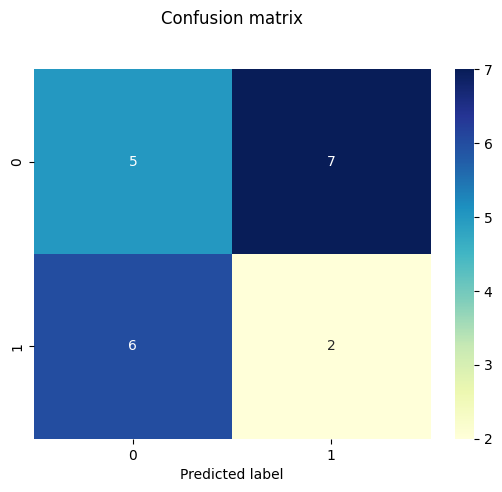

In [23]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title("Confusion matrix", y = 1.1)
plt.xlabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [24]:
# Các độ đo đánh gái mô hình phân lớp
# N là số lượng mẫu: TP+FP+FN+TN
# TP, FP, FN, TN
# accuracy = (TP + TN) / (TP + FP + FN + TN)
# Precision = TP/(TP+FP)
# Recall = TP / (TP+FN)
# F1-Score = 2 * Precision * Recall / (Precision + Recall)

In [25]:
from sklearn.metrics import classification_report
target_name = ['Not oriented', 'Oriented']
print(classification_report(y_test, y_pred_test, target_names=target_name))

              precision    recall  f1-score   support

Not oriented       0.45      0.42      0.43        12
    Oriented       0.22      0.25      0.24         8

    accuracy                           0.35        20
   macro avg       0.34      0.33      0.34        20
weighted avg       0.36      0.35      0.35        20



In [26]:
# Đồ thị đánh giá AUC và ROC
# Viền màu xanh nằm dưới đường màu đỏ là mô hình k tốt
# Viền màu xanh phủ hết thì tốt

In [27]:
# Lưu trữ mô hình phân loại xuống thiết bị
# model_logistic_regression.sav
import pickle
pickle.dump(model, open("model_logistic_regression.sav", 'wb'))

In [28]:
# Tự viết chương trình cho phép nhập từ bàn phím 3 điểm NN, LG, UX sau đó dự đoán định hướng nghề nghiệp
import pickle
# Load model từ storage
loaded_model = pickle.load(open("model_logistic_regression.sav", 'rb'))
vNN = float(input('Điểm ngôn ngữ: '))
vLG = float(input('Điểm logic: '))
vUX = float(input('Điểm ứng xử: '))
y_pred = loaded_model.predict([[vNN, vLG, vUX]])
print('Dự báo định hướng: ' + str(y_pred[0]))

Dự báo định hướng: 1
